In [2]:
import pandas as pd
import numpy as np

In [3]:
# these are computed by electric_capacity.ipynb
power_counts_23 = pd.read_csv('../data/apr2023/power_counts.csv')
power_counts_23.name = '2023'
power_counts_24 = pd.read_csv('../data/dec2024/power_counts.csv')
power_counts_24.name = '2024'
power_counts_25 = pd.read_csv('../data/may2025/power_counts.csv')
power_counts_25.name = '2025'

In [15]:
def show_stats(df, col='max_power'):
    all_vals = np.repeat(df[col].to_list(), df['count'].to_list())
    s = pd.Series(all_vals)
    print(s.describe())

print(show_stats(power_counts_23))
print(show_stats(power_counts_24))
print(show_stats(power_counts_25))

    

count    34567.000000
mean       133.305002
std         56.020356
min         46.000000
25%         86.000000
50%        125.000000
75%        160.000000
max        250.000000
dtype: float64
None
count    100704.000000
mean        131.956576
std          62.021856
min          46.000000
25%          86.000000
50%          92.000000
75%         160.000000
max         300.000000
dtype: float64
None
count    137886.000000
mean        126.340723
std          64.155069
min          46.000000
25%          80.000000
50%          86.000000
75%         160.000000
max         318.000000
dtype: float64
None


In [17]:
print(show_stats(power_counts_23, col='capacity'))
print(show_stats(power_counts_24, col='capacity'))


count    34567.000000
mean        62.333494
std          8.551901
min         50.000000
25%         58.000000
50%         59.000000
75%         63.100000
max         90.000000
dtype: float64
None
count    100704.000000
mean         63.157963
std           9.004179
min          50.000000
25%          58.000000
50%          59.000000
75%          64.000000
max          92.000000
dtype: float64
None


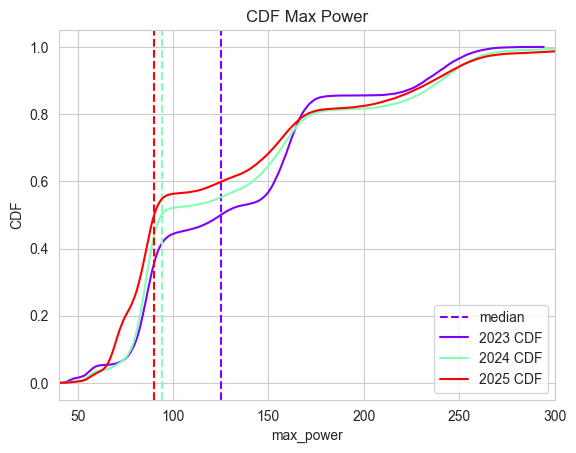

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

def cdf_plot_from_dfs(dfs, x_col: str, title: str = None, jitter: float = 0.01, cap: float = 300.0):
    """
    Generate a smoothed CDF plot from multiple DataFrames using jittered data.

    Parameters:
    - dfs (List[pd.DataFrame]): List of DataFrames containing values and their counts.
    - x_col (str): The name of the column containing the values.
    - title (str, optional): The title for the plot. Defaults to None.
    - jitter (float, optional): The amount of jitter to add to the values. Defaults to 0.01.
    - cap (float, optional): The maximum value to cap the CDF plot. Defaults to 300.0.

    Returns:
    - None
    """
    fig, ax = plt.subplots()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs)))
    median_label_shown = False
    
    for df, color in zip(dfs, colors):
        # Extract the values and their counts
        values = df[x_col].to_list()
        counts = df['count'].to_list()

        # Create numpy array with repeated values based on their counts
        all_values = np.repeat(values, counts)

        # Add jitter to the values
        all_values *= (1 + np.random.normal(scale=jitter, size=len(all_values)))

        # Sort the values for CDF calculation
        all_values.sort()

        # Calculate the CDF
        cdf = np.linspace(0, 1, len(all_values))

        # Draw marker line for the median
        median = np.median(all_values)
        if median_label_shown:
            ax.axvline(median, color=color, linestyle='--')
        else:
            ax.axvline(median, color=color, linestyle='--', label="median")
            median_label_shown = True

        # Plot the smoothed CDF
        ax.plot(all_values, cdf, label=f"{df.name} CDF", color=color)

    # Cap the x-axis if specified
    if cap:
        ax.set_xlim(left=0, right=cap)

    # Add a title if provided
    if title:
        ax.set_title(title)

    # Set labels, legend, and show the plot
    ax.set_xlabel(x_col)
    ax.set(ylabel='CDF')
    plt.xlim(40, cap)
    
    # Create legend with CDF and median labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    
    plt.show()

cdf_plot_from_dfs([power_counts_23, power_counts_24, power_counts_25], 'max_power', 'CDF Max Power', jitter=0.05, cap=300)

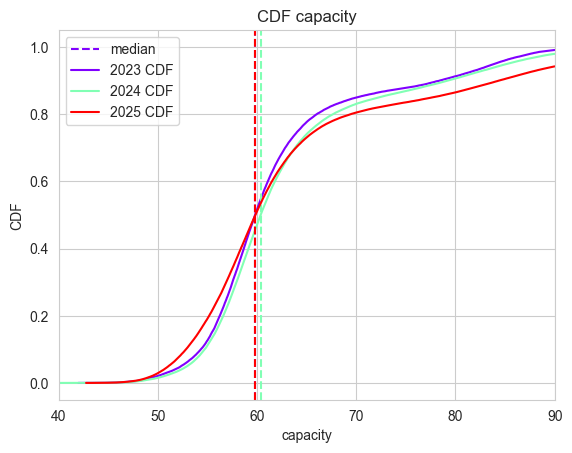

In [14]:
cdf_plot_from_dfs([power_counts_23, power_counts_24, power_counts_25], 'capacity', 'CDF capacity', jitter=0.05, cap=90) 